<a href="https://colab.research.google.com/github/Harshini1905/DL-Grocery-item-recognition/blob/main/DL_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MobileNet architecture


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os

# Paths to the dataset
train_dir = '/content/drive/MyDrive/IVA Micro project/train'
val_dir = '/content/drive/MyDrive/IVA Micro project/val'
test_dir = '/content/drive/MyDrive/IVA Micro project/test'

# Set up data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load the MobileNetV2 model with pretrained weights, excluding top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the trained model
model.save('grocery_item_model.h5')


Found 2966 images belonging to 3 classes.
Found 296 images belonging to 3 classes.
Found 2495 images belonging to 3 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 2718s 28s/step - accuracy: 0.7904 - loss: 0.5331 - val_accuracy: 0.7708 - val_loss: 0.5338
Epoch 2/10
 1/92 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9062 - loss: 0.3012

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9062 - loss: 0.3012 - val_accuracy: 0.8750 - val_loss: 0.2174
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 45s 459ms/step - accuracy: 0.8979 - loss: 0.2715 - val_accuracy: 0.4965 - val_loss: 1.3985
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9375 - loss: 0.1608 - val_accuracy: 0.3750 - val_loss: 1.3137
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 461ms/step - accuracy: 0.9333 - loss: 0.1905 - val_accuracy: 0.4653 - val_loss: 1.4280
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9688 - loss: 0.0822 - val_accuracy: 0.5000 - val_loss: 0.9382
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 46s 465ms/step - accuracy: 0.9424 - loss: 0.1677 - val_accuracy: 0.5764 - val_loss: 1.1923
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9375 - loss: 0.2596 - val_accuracy: 0.6250 - val_loss: 0.5397
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 45s 457ms/step - accuracy: 0.9364 - loss: 0.1667 - val_accuracy: 0.3889 - val_

Test Accuracy: 93.87%


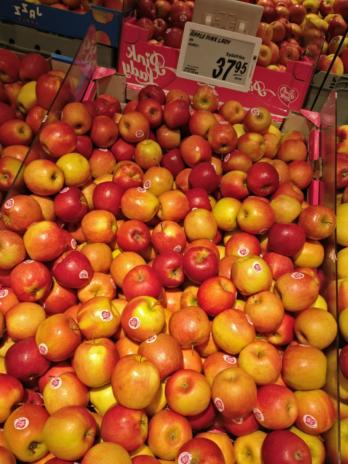

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Label: fruits, Confidence: 95.75%


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow

# Load the trained model
model = load_model('grocery_item_model.h5')

# Path to the new image for prediction
image_path = "/content/drive/MyDrive/IVA Micro project/test/Fruit/Apple/Pink-Lady/Pink-Lady_002.jpg"
img_cv = cv2.imread(image_path)  # Read the image with OpenCV
cv2_imshow(img_cv)  # Display the image in Colab

# Load and preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to the same size used during training
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add an extra batch dimension
    img_array = img_array / 255.0  # Normalize the image to match training conditions
    return img_array

# Predict the class of the image
def predict_image(img_path):
    img = preprocess_image(img_path)
    predictions = model.predict(img)  # Get prediction probabilities
    predicted_class = np.argmax(predictions[0])  # Get the index of the highest predicted probability
    class_labels = ['fruits', 'vegetables', 'packages']  # Replace with actual class names used in training
    predicted_label = class_labels[predicted_class]  # Get the corresponding class label
    confidence = predictions[0][predicted_class]  # Confidence of the prediction
    return predicted_label, confidence

# Make prediction and print the result
predicted_label, confidence = predict_image(image_path)
print(f"Predicted Label: {predicted_label}, Confidence: {confidence * 100:.2f}%")


YOLO


In [ ]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Install dependencies
!pip install -r requirements.txt

# Import required libraries
import os
import torch
import numpy as np
from PIL import Image

# Load the YOLOv5 model (pre-trained or custom-trained model)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Define categories: fruits, vegetables, packages
grocery_categories = {
    'fruits': ['apple', 'avocado', 'banana', 'kiwi', 'lemon', 'lime', 'mango', 'melon',
               'nectarine', 'orange', 'papaya', 'passion-fruit', 'peach', 'pear',
               'pineapple', 'plum', 'pomegranate', 'red-grapefruit', 'satsumas'],
    'vegetables': ['asparagus', 'aubergine', 'brown-cap mushrooms', 'cabbage', 'carrot',
                   'cucumber', 'garlic', 'ginger', 'leek', 'onion', 'pepper', 'potato',
                   'red-beet', 'tomato', 'zucchini'],
    'packages': ['juice', 'milk', 'oatghurt', 'oat-milk', 'sour-cream', 'sour-milk',
                 'yoghurt', 'soyghurt', 'soy-milk']
}

# Function to detect grocery items and estimate calories
def detect_grocery_items(image_path):
    # Load image
    img = Image.open(image_path)

    # Perform detection using YOLOv5
    results = model(img)

    # Display the image with bounding boxes
    results.show()

    # Get detected objects
    detected_objects = results.pandas().xyxy[0]

    # Group detections by categories (fruits, vegetables, packages)
    detected_items = {'fruits': [], 'vegetables': [], 'packages': []}

    for _, row in detected_objects.iterrows():
        item_name = row['name']  # Detected object label (grocery item name)
        confidence = row['confidence']  # Confidence of detection

        # Print detected item and confidence level
        print(f"Detected: {item_name} (Confidence: {confidence:.2f})")

        # Check the category of the detected item
        for category, items in grocery_categories.items():
            if item_name in items:
                detected_items[category].append(item_name)

                # Estimate calories for the detected grocery item
                calories = estimate_calories(item_name)
                print(f"Estimated calories for {item_name}: {calories}")
                break

    return detected_items

# Function to process a directory of grocery images
def process_grocery_images(directory_path):
    for root, dirs, files in os.walk(directory_path):
        for filename in files:
            if filename.endswith(('.jpg', '.png')):
                image_path = os.path.join(root, filename)
                print(f"\nProcessing image: {filename}")
                detected_items = detect_grocery_items(image_path)

                # Print detected items for each category
                print(f"Fruits: {detected_items['fruits']}")
                print(f"Vegetables: {detected_items['vegetables']}")
                print(f"Packages: {detected_items['packages']}")

# Example usage: Process a folder of test grocery images
grocery_images_directory = '/content/drive/MyDrive/IVA Micro project/val'
process_grocery_images(grocery_images_directory)


In [ ]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Install dependencies
!pip install -r requirements.txt

# Import required libraries
import torch
from PIL import Image

# Load the YOLOv5 model (pre-trained or custom-trained model)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Function to predict the class of the given image
def predict_class(image_path):
    # Load image
    img = Image.open(image_path)

    # Perform detection using YOLOv5
    results = model(img)

    # Get detected objects
    detected_objects = results.pandas().xyxy[0]

    if detected_objects.empty:
        print("No objects detected.")
        return None

    # Print each detected class and its confidence
    for _, row in detected_objects.iterrows():
        class_label = row['name']  # Class name of the detected object
        confidence = row['confidence']  # Confidence level of detection
        print(f"Detected class: {class_label} (Confidence: {confidence:.2f})")

    # Return the first detected class
    return detected_objects['name'].iloc[0]  # Returning the class of the first detected object

# Example usage: Predict the class of an image
image_path = '/content/drive/MyDrive/IVA Micro project/test/Fruit/Banana/Banana_001.jpg'
predicted_class = predict_class(image_path)

if predicted_class:
    print(f"Predicted class of the image: {predicted_class}")


Cloning into 'yolov5'...
remote: Enumerating objects: 17018, done.
remote: Counting objects: 100% (213/213), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 17018 (delta 120), reused 124 (delta 68), pack-reused 16805 (from 1)
Receiving objects: 100% (17018/17018), 15.73 MiB | 19.60 MiB/s, done.
Resolving deltas: 100% (11658/11658), done.
/content/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-21 Python-3.10.12 torch-2.4.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 99.6MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detected class: banana (Confidence: 0.48)
Detected class: banana (Confidence: 0.43)
Detected class: orange (Confidence: 0.43)
Detected class: orange (Confidence: 0.41)
Detected class: banana (Confidence: 0.30)
Detected class: banana (Confidence: 0.29)
Detected class: banana (Confidence: 0.27)
Detected class: orange (Confidence: 0.27)
Predicted class of the image: banana


In [ ]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Install dependencies
!pip install -r requirements.txt

# Import required libraries
import torch
from PIL import Image

# Load the YOLOv5 model (pre-trained or custom-trained model)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Function to predict the class of the given image
def predict_class(image_path):
    # Load image
    img = Image.open(image_path)

    # Perform detection using YOLOv5
    results = model(img)

    # Get detected objects
    detected_objects = results.pandas().xyxy[0]

    if detected_objects.empty:
        print("No objects detected.")
        return None

    # Print each detected class and its confidence
    for _, row in detected_objects.iterrows():
        class_label = row['name']  # Class name of the detected object
        confidence = row['confidence']  # Confidence level of detection
        print(f"Detected class: {class_label} (Confidence: {confidence:.2f})")

    # Return the first detected class
    return detected_objects['name'].iloc[0]  # Returning the class of the first detected object

# Example usage: Predict the class of an image
image_path = '/content/drive/MyDrive/IVA Micro project/train/Vegetables/Carrots/Carrots_001.jpg'
predicted_class = predict_class(image_path)

if predicted_class:
    print(f"Predicted class of the image: {predicted_class}")


Cloning into 'yolov5'...
remote: Enumerating objects: 17018, done.
remote: Counting objects: 100% (213/213), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 17018 (delta 120), reused 124 (delta 68), pack-reused 16805 (from 1)
Receiving objects: 100% (17018/17018), 15.73 MiB | 19.25 MiB/s, done.
Resolving deltas: 100% (11658/11658), done.
/content/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-21 Python-3.10.12 torch-2.4.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 93.2MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detected class: carrot (Confidence: 0.45)
Detected class: carrot (Confidence: 0.43)
Detected class: carrot (Confidence: 0.39)
Detected class: carrot (Confidence: 0.37)
Detected class: carrot (Confidence: 0.34)
Detected class: carrot (Confidence: 0.33)
Detected class: carrot (Confidence: 0.30)
Detected class: carrot (Confidence: 0.29)
Detected class: carrot (Confidence: 0.29)
Detected class: carrot (Confidence: 0.28)
Detected class: carrot (Confidence: 0.27)
Detected class: carrot (Confidence: 0.26)
Predicted class of the image: carrot


VGG16

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os

# Set parameters
input_shape = (128, 128, 3)  # Ensure this matches your target size
batch_size = 16
num_epochs = 5

# Set up dataset directories
train_dir = '/content/drive/MyDrive/IVA Micro project/test'  # Update with your training data path
test_dir = '/content/drive/MyDrive/IVA Micro project/val'     # Update with your test data path

# Data augmentation and preparation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Match with input_shape
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Match with input_shape
    batch_size=batch_size,
    class_mode='categorical'
)

# Use VGG16 as the base model
vgg16 = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
vgg16.trainable = False  # Freeze the base model layers

# Create R-CNN model
def create_rcnn_model(num_classes):
    inputs = keras.Input(shape=input_shape)
    x = vgg16(inputs)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)  # Change this to 'sigmoid' for binary classification
    model = keras.Model(inputs, outputs)
    return model

# Create model
model = create_rcnn_model(num_classes=len(train_generator.class_indices))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=num_epochs, validation_data=test_generator)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy:.2f}')


Found 2495 images belonging to 3 classes.
Found 296 images belonging to 3 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/156 ━━━━━━━━━━━━━━━━━━━━ 1319s 8s/step - accuracy: 0.7292 - loss: 1.0875 - val_accuracy: 0.8378 - val_loss: 0.3484
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 24s 147ms/step - accuracy: 0.8517 - loss: 0.3384 - val_accuracy: 0.8176 - val_loss: 0.3747
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 40s 141ms/step - accuracy: 0.8641 - loss: 0.3243 - val_accuracy: 0.8311 - val_loss: 0.3614
Epoch 4/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 41s 142ms/step - accuracy: 0.8702 - loss: 0.3134 - val_accuracy: 0.8682 - val_loss: 0.2808
Epoch 5/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 24s 144ms/step - accuracy: 0.8636 - loss: 0.3081 - val_accuracy: 0.8581 - val_loss: 0.2753
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.8528 - loss: 0.2838
Test accuracy: 0.86


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: Fruit, Confidence: 0.97


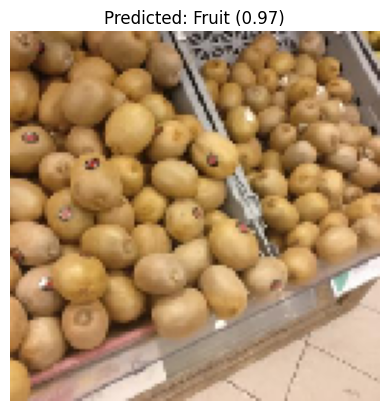

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(128, 128)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale to [0, 1]
    return img_array

# Function to predict the class of an image
def predict_image_class(img_path, model, class_indices):
    # Load and preprocess the image
    img_array = load_and_preprocess_image(img_path)

    # Make prediction
    predictions = model.predict(img_array)

    # Get the class index with the highest probability
    predicted_class_index = np.argmax(predictions[0])

    # Map the index to the class name
    class_labels = list(class_indices.keys())
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label, predictions[0][predicted_class_index]

# Example usage
test_image_path = '/content/drive/MyDrive/IVA Micro project/train/Fruit/Kiwi/Kiwi_001.jpg'  # Update with the path to your test image
predicted_class, confidence = predict_image_class(test_image_path, model, train_generator.class_indices)

# Display the result
print(f'Predicted Class: {predicted_class}, Confidence: {confidence:.2f}')

# Optional: Display the image
img = image.load_img(test_image_path, target_size=(128, 128))
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted: {predicted_class} ({confidence:.2f})')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class: Packages, Confidence: 1.00


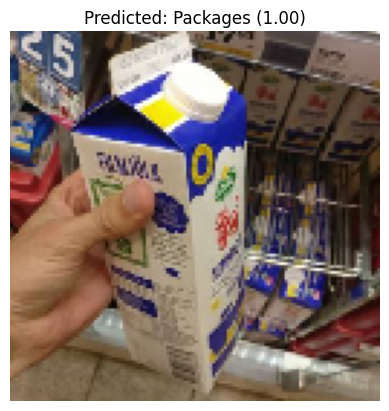

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(128, 128)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale to [0, 1]
    return img_array

# Function to predict the class of an image
def predict_image_class(img_path, model, class_indices):
    # Load and preprocess the image
    img_array = load_and_preprocess_image(img_path)

    # Make prediction
    predictions = model.predict(img_array)

    # Get the class index with the highest probability
    predicted_class_index = np.argmax(predictions[0])

    # Map the index to the class name
    class_labels = list(class_indices.keys())
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label, predictions[0][predicted_class_index]

# Example usage
test_image_path = '/content/drive/MyDrive/IVA Micro project/train/Packages/Sour-Milk/Arla-Sour-Milk/Arla-Sour-Milk_007.jpg'  # Update with the path to your test image
predicted_class, confidence = predict_image_class(test_image_path, model, train_generator.class_indices)

# Display the result
print(f'Predicted Class: {predicted_class}, Confidence: {confidence:.2f}')

# Optional: Display the image
img = image.load_img(test_image_path, target_size=(128, 128))
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted: {predicted_class} ({confidence:.2f})')
plt.show()
